
Date: 06/08/2021 

Name: Nikita Sunil Patil

Email.ID: patilnikita7188@gmail.com


  

SKILL :

Implement clustering algorithm with graphical presentation of clusters
check if PCA is needed.

K-means, hierarchical clustering- dendogram to present clusters, 
DBSCAN

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
sns.set()
import time
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from matplotlib import style
import scipy.cluster.hierarchy as shc
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_ = pd.read_excel(r'/content/delivery-driver.xlsx')

In [ ]:
data_

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [ ]:
data_.shape

(4000, 3)

data is having 4000 observations with 3 variable.

In [ ]:
data_.dtypes

Driver_ID             int64
Distance_Feature    float64
Speeding_Feature      int64
dtype: object

here data contain some types like :

int : Driver_ID and Speeding_Feature

float : Distance_Feature

In [ ]:
data_.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


The delivery driver data having 4000 observations for each variable. Also data gives mean , standard deviation , minimum value , Q1 , Q2 , Q3 and maximum value for each variable respectively.


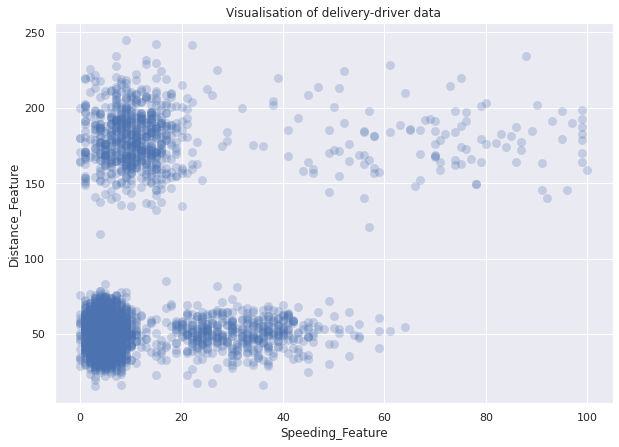

In [ ]:
plt.figure(figsize=(10,7))

X = data_[["Distance_Feature","Speeding_Feature"]]
#Visualise data points
plt.scatter(X["Speeding_Feature"],X["Distance_Feature"],c='b',**plot_kwds)
plt.title('Visualisation of delivery-driver data')
plt.xlabel('Speeding_Feature')
plt.ylabel('Distance_Feature')
plt.show()


It will give us two clusters 

In [ ]:
X = data_.iloc[:, :-1].values 
y = data_.iloc[:, -1].values

In [ ]:
print(X)
print("*******************************************")
print(y)

[[3.42331194e+09 7.12400000e+01]
 [3.42331321e+09 5.25300000e+01]
 [3.42331372e+09 6.45400000e+01]
 ...
 [3.42331292e+09 1.70910000e+02]
 [3.42331363e+09 1.76140000e+02]
 [3.42331153e+09 1.68030000e+02]]
*******************************************
[28 25 27 ... 12  5  9]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [ ]:
data_scaled=normalize(data_)
data_scaled=pd.DataFrame(data_scaled, columns=data_.columns)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([3, 3, 3, ..., 1, 1, 1])

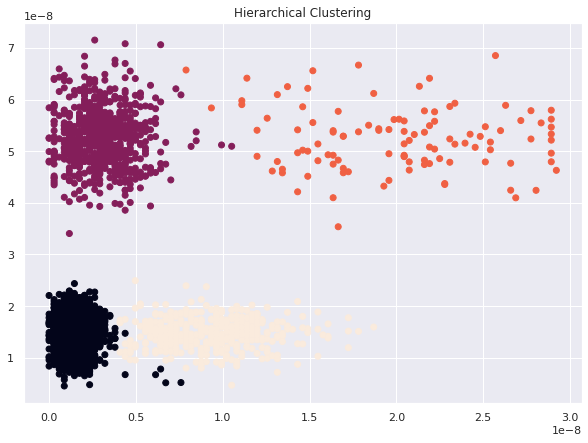

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Hierarchical Clustering')
plt.scatter(data_scaled['Speeding_Feature'],data_scaled['Distance_Feature'], c=cluster.labels_)

In [ ]:
# Generate sample data
#centers = Data[['Speeding_Feature','Distance_Feature']]

X, labels_true = make_blobs(n_samples   = 750, 
                            centers     = X_train, 
                            cluster_std = 0.4,
                            random_state= 0)

In [ ]:
X[:3]

array([[3.42331217e+09, 4.20880224e+01],
       [3.42331166e+09, 4.94258829e+01],
       [3.42331179e+09, 1.88084180e+02]])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
labels_true

array([149, 360,  88, 729,  18, 462, 388, 612,  78,  81, 275, 398, 287,
       663, 309, 117, 294, 402, 723, 619, 670, 693, 685, 665, 463, 415,
       542,  59,  87, 518, 172, 308, 346,  39, 353, 185, 605,  45,  62,
       635, 500, 410, 298, 453, 278, 393, 236, 684,  80, 496, 730, 532,
       452, 257, 690, 568, 464,  55, 550, 420, 515, 526, 549, 647, 656,
        11, 696, 546,  51,  19, 248, 660,  94, 224, 566, 283, 139, 352,
        44, 727, 358, 306, 228,  33, 130,  99, 328, 534, 315, 591, 503,
        67, 401, 186, 381, 118, 413, 383, 120, 205, 567, 436, 706, 158,
       648, 505, 594, 664, 146, 196, 247, 450, 327, 344, 290, 122, 215,
       363, 140, 440, 629, 473,  61, 202, 409, 725, 429,  86,  22, 583,
        32, 720, 624, 652, 241, 342, 501, 731, 141, 418, 209, 544, 220,
        60, 657, 702, 628, 517, 469,  12, 607, 489, 472, 738, 600, 661,
         1, 406,  21, 439,  31, 334,  90, 575, 740, 343, 271, 528, 504,
       333, 103, 253, 603, 553, 543, 329, 293, 530, 708, 165, 38

In [ ]:
db = DBSCAN(eps=.3, min_samples=7).fit(X)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# labels for all the rows
print(labels)

[ 0  0  1  0  0  0  0  0  0  1 -1  0  0  0  0  1  0  1  0  0  0  0  0  0
  1  0  0  0  0  0  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1
  1  0  0  0  1  0  0  1  1 -1  0  0  0  1  0  1  0  0  0  0  0  0  0  0
  0  0  0  1  0  1 -1  0  1  0  0  0  0  1  0  1  1  0  0  0  0  0  1  0
  1  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0  0  0  1  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0
  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  1  1  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0
 -1  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  1
  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  1  0
  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0  1  1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  1  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  1  1  0  0  1  1  0  0  0  0  0

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

2


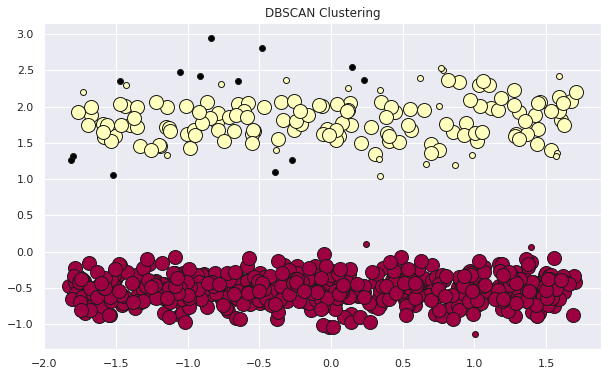

In [ ]:
# Plot result
plt.figure(figsize=(10,6))
# Black removed and is used for noise instead.
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.show()
style.use('classic')

DBSCAN stands for “density based spatial clustering of applications with noise”. works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space) and points that are within a dense region are called core samples or core points. And above diagram gives 2 proper cluster.

In [ ]:
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `X` and `y` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
X = data_[['Distance_Feature', 'Speeding_Feature']]

In [ ]:
# Nc = range(1, 20)
# kmeans = [KMeans(n_clusters=i) for i in Nc]
# kmeans
# score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
# score
# pl.plot(Nc,score)
# pl.xlabel('Number of Clusters')
# pl.ylabel('Score')
# pl.title('Elbow Curve')
# pl.show()

# When we graph the plot, we see that the graph levels off rapidly after 3 
# clusters, implying that addition of more clusters do not explain much more 
# of the variance in our relevant variable; in this case stock returns.

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(X)

In [ ]:
print(np.unique(kmeans.labels_))
len(np.unique(kmeans.labels_))

[0 1 2 3]


4

In [ ]:
# Centroid values
kmeans.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

In [ ]:
centers = kmeans.cluster_centers_

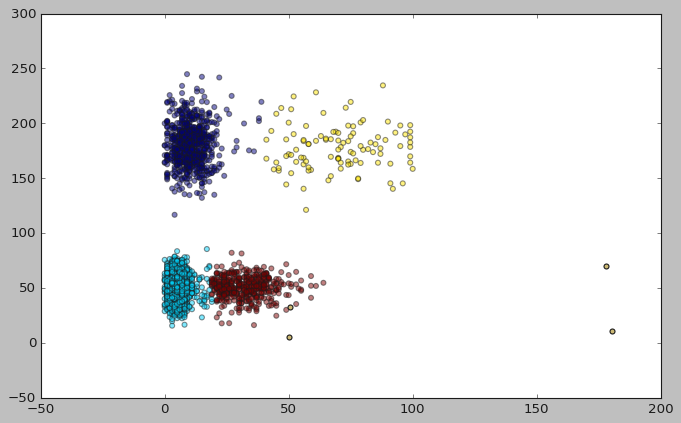

In [ ]:
plt.figure(figsize=(10,6))

colmap = {1: 'g', 2: 'r', 3: 'm'}
plt.scatter(X['Speeding_Feature'], 
            X['Distance_Feature'], 
            c=kmeansoutput.labels_.astype(float), 
            alpha=0.5, 
            edgecolor='k')

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(centers[i][0], centers[i][1], c='y')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Text(0, 0.5, 'Distance_Feature')

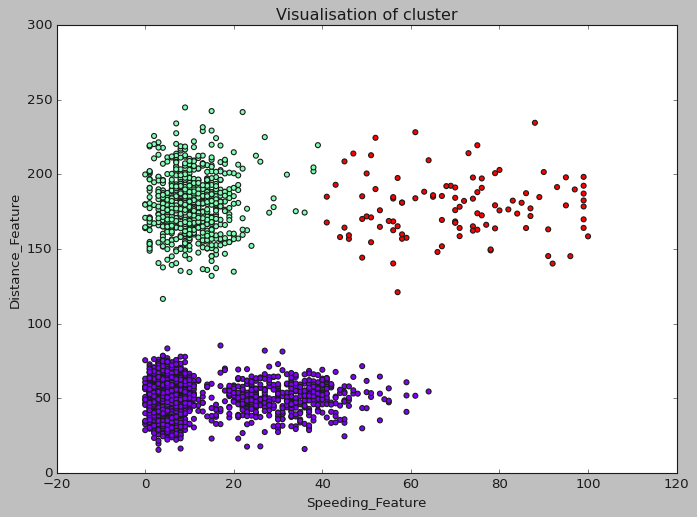

In [ ]:
plt.figure(figsize=(10,7))
data_with_clusters = data_.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Speeding_Feature'],data_with_clusters['Distance_Feature'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('Visualisation of cluster')
plt.xlabel('Speeding_Feature')
plt.ylabel('Distance_Feature')

In [ ]:
data_scaled = normalize(data_)
data_scaled = pd.DataFrame(data_scaled, columns=data_.columns)
data_scaled.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,1.0,2.081026e-08,8.179214e-09
1,1.0,1.534478e-08,7.302867e-09
2,1.0,1.885308e-08,7.887095e-09
3,1.0,1.626787e-08,6.426526e-09
4,1.0,1.594363e-08,7.302871e-09


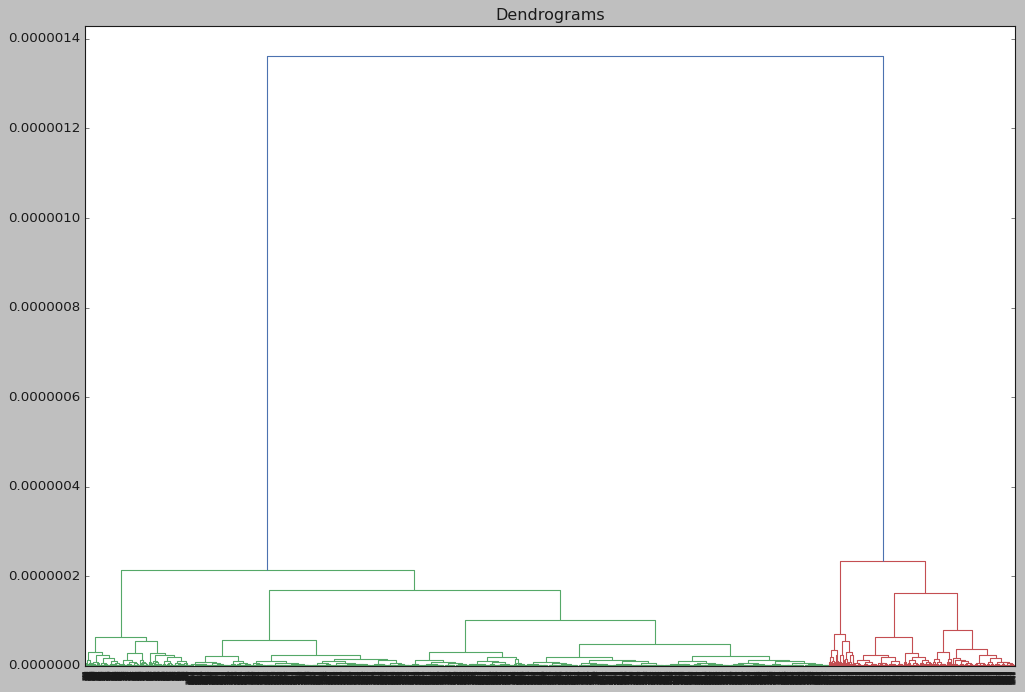

In [ ]:
plt.figure(figsize=(15,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

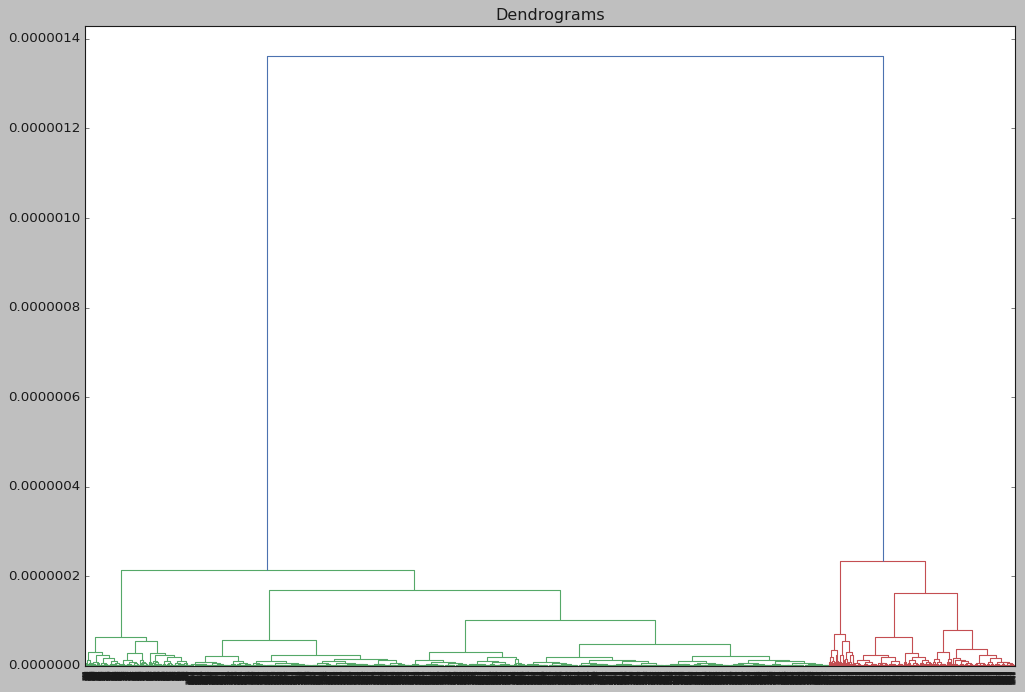

In [ ]:
plt.figure(figsize=(15,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')